In [303]:
#Import packages, read housing-datase, prepare dataset, print the dataframe head

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataframe = pandas.read_csv("housing-data.txt", delim_whitespace=True, header=None)
dataset = dataframe.values
print (dataframe.head())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


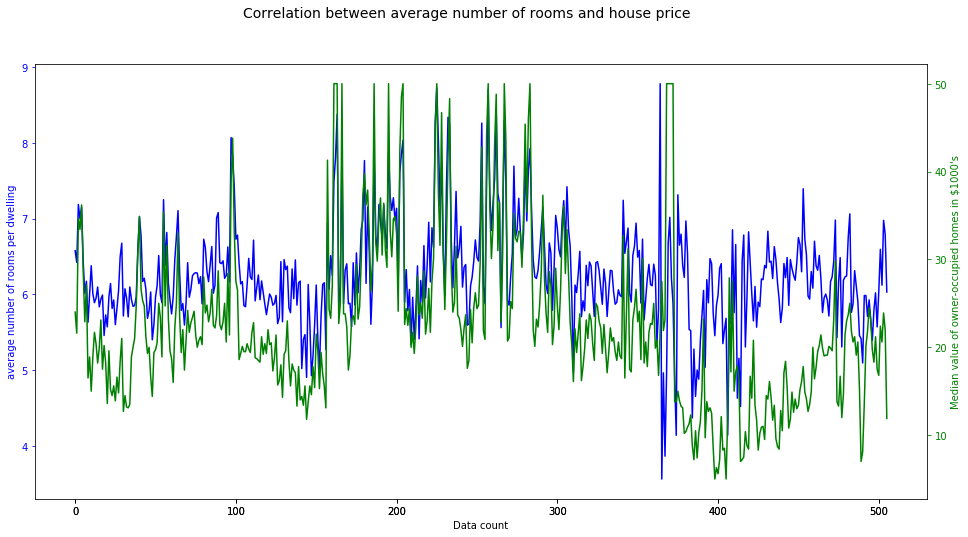

In [304]:
#Plot column heading 5 and 13 from dataset to see correlation between number or rooms and price

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Correlation between average number of rooms and house price', fontsize=14)

y_values1 = dataset[:,5]
draw_01=fig.add_subplot(111)
draw_01.plot(y_values1, color="b")
draw_01.set_ylabel("average number of rooms per dwelling", color="b")
draw_01.tick_params(axis='y', colors="b")

y_values2 = dataset[:,13]
draw_02=fig.add_subplot(111, frame_on=False)
draw_02.plot(y_values2, color="g")
draw_02.set_ylabel('Median value of owner-occupied homes in $1000\'s', color="g")        
draw_02.yaxis.tick_right()
draw_02.yaxis.set_label_position('right')
draw_02.tick_params(axis='y', colors="g")

draw_01.set_xlabel("Data count")

plt.show()

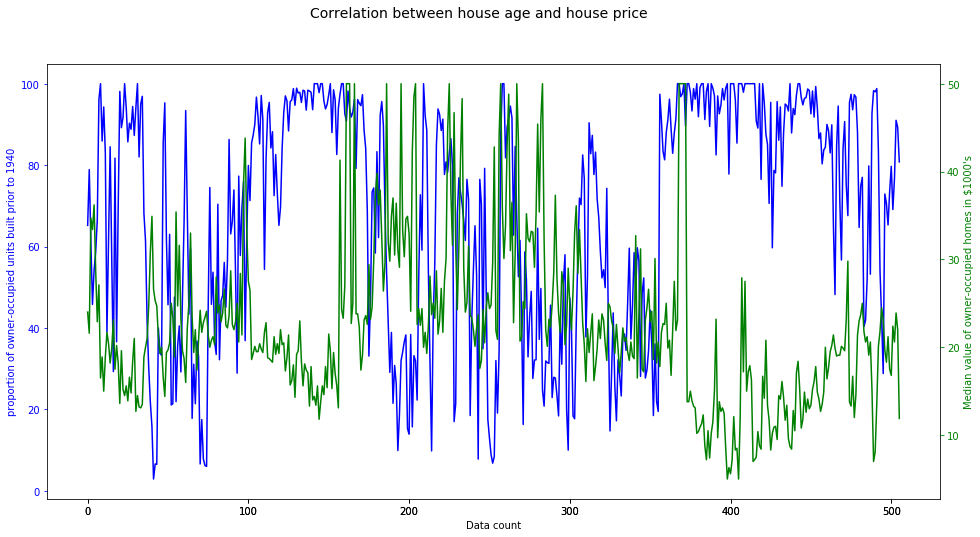

In [305]:
#Plot data from column heading 6 and 13 of dataset (house age and price)

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Correlation between house age and house price', fontsize=14)

y_values1 = dataset[:,6]
draw_01=fig.add_subplot(111)
draw_01.plot(y_values1, color="b")
draw_01.set_ylabel("proportion of owner-occupied units built prior to 1940", color="b")
draw_01.tick_params(axis='y', colors="b")

y_values2 = dataset[:,13]
draw_02=fig.add_subplot(111, frame_on=False)
draw_02.plot(y_values2, color="g")
draw_02.set_ylabel('Median value of owner-occupied homes in $1000\'s', color="g")        
draw_02.yaxis.tick_right()
draw_02.yaxis.set_label_position('right')
draw_02.tick_params(axis='y', colors="g")

draw_01.set_xlabel("Data count")

plt.show()

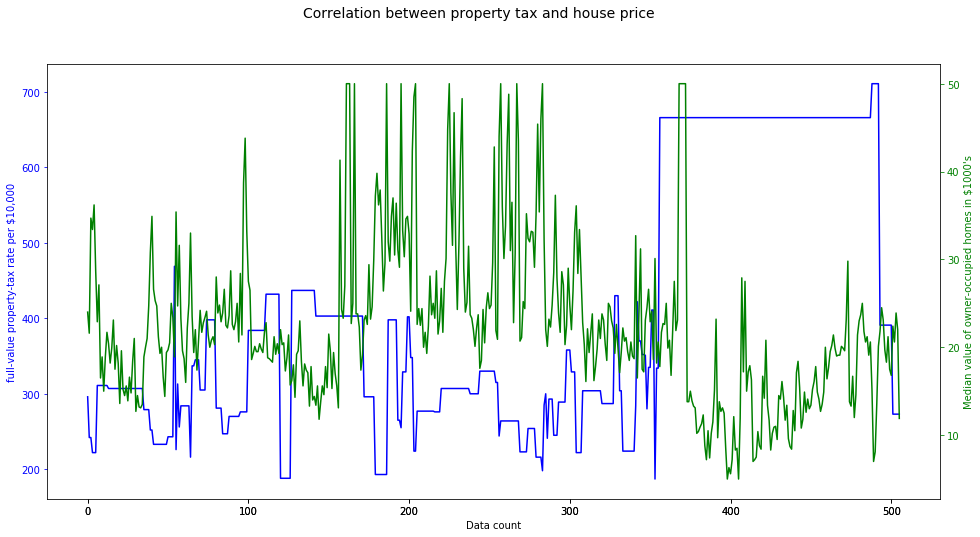

In [306]:
#Plot data from column heading 9 and 13 of dataset (housing tax and price)

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Correlation between property tax and house price', fontsize=14)

y_values1 = dataset[:,9]
draw_01=fig.add_subplot(111)
draw_01.plot(y_values1, color="b")
draw_01.set_ylabel("full-value property-tax rate per $10,000", color="b")
draw_01.tick_params(axis='y', colors="b")

y_values2 = dataset[:,13]
draw_02=fig.add_subplot(111, frame_on=False)
draw_02.plot(y_values2, color="g")
draw_02.set_ylabel('Median value of owner-occupied homes in $1000\'s', color="g")        
draw_02.yaxis.tick_right()
draw_02.yaxis.set_label_position('right')
draw_02.tick_params(axis='y', colors="g")

draw_01.set_xlabel("Data count")

plt.show()

In [307]:
#Assign first 13 columns as input attributes X and 14th column (price) as output value Y

X = dataset[:,0:13]
Y = dataset[:,13]

#Split the train and test data into 66% and 33%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=16)

#Define and compile neural network model, 13 --> 6 --> 1, with 26 neurons

def baseline_model():
    model = Sequential()
    model.add(Dense(26, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#Train the model with train data, use KerasRegressor as it's the problem of regression rather than classification

seed = 8
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)

print("Model validation and predictions analysis \n")
print("Average of mean squared error: %.2f" % (results.mean()))
print("Standard deviation of mean squared error: %.2f \n" % (results.std()))

pipeline.fit(X_train, Y_train)

#Predict the output of model with test data

prediction = pipeline.predict(X_test)
j = 0
print ("Predicted","\t","Actual")
for i in prediction:
    print ((round(i)),"\t\t",Y_test[j])
    j = j + 1

Model validation and predictions analysis 

Average of mean squared error: 17.06
Standard deviation of mean squared error: 10.42 

Predicted 	 Actual
26.0 		 23.3
13.0 		 12.8
9.0 		 6.3
38.0 		 35.2
19.0 		 17.1
21.0 		 24.3
21.0 		 19.6
16.0 		 19.5
18.0 		 17.8
44.0 		 45.4
14.0 		 14.1
15.0 		 11.9
12.0 		 12.7
26.0 		 25.2
10.0 		 13.8
29.0 		 22.0
20.0 		 23.0
34.0 		 30.1
17.0 		 20.6
16.0 		 23.2
24.0 		 20.6
18.0 		 18.0
16.0 		 15.7
10.0 		 17.9
13.0 		 17.2
14.0 		 20.2
10.0 		 7.5
18.0 		 20.0
13.0 		 14.1
11.0 		 10.5
21.0 		 19.0
16.0 		 20.5
7.0 		 7.0
10.0 		 8.7
11.0 		 11.8
29.0 		 23.6
16.0 		 11.7
15.0 		 27.5
41.0 		 42.3
16.0 		 17.5
25.0 		 21.6
37.0 		 35.4
30.0 		 32.9
13.0 		 18.5
21.0 		 21.1
21.0 		 22.9
17.0 		 14.1
12.0 		 17.2
10.0 		 14.6
20.0 		 23.1
24.0 		 22.6
15.0 		 13.4
14.0 		 14.0
16.0 		 13.3
36.0 		 31.0
12.0 		 17.6
44.0 		 41.7
35.0 		 34.9
24.0 		 17.8
23.0 		 22.3
38.0 		 35.1
30.0 		 33.0
26.0 		 22.4
23.0 		 20.2
17.0 		 19.8
30.0 		 28.

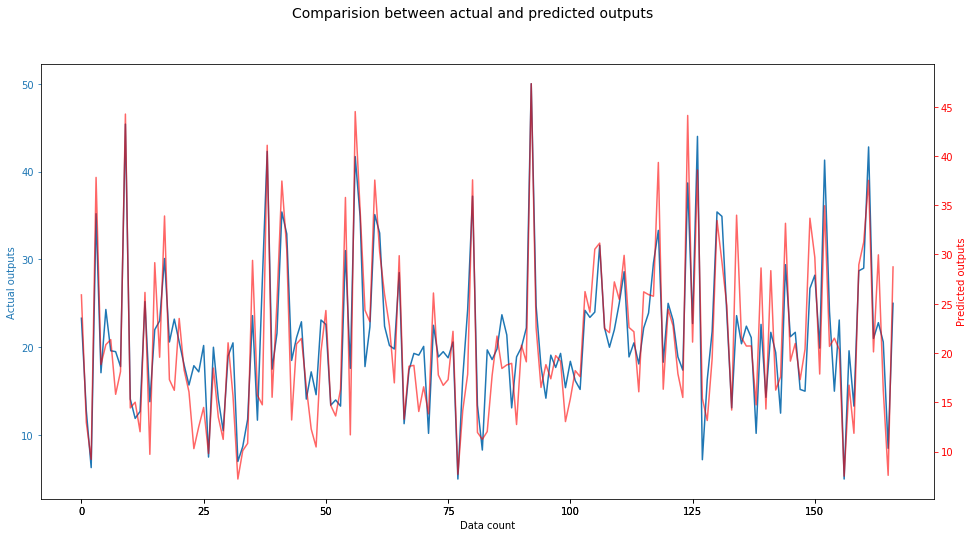

In [308]:
#Plot predicted output and actual output for comparision

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Comparision between actual and predicted outputs', fontsize=14)

y_values1 = Y_test
draw_01=fig.add_subplot(111)
draw_01.plot(y_values1, color="C0")
draw_01.set_ylabel("Actual outputs", color="C0")
draw_01.tick_params(axis='y', colors="C0")

y_values2 = prediction
draw_02=fig.add_subplot(111, frame_on=False)
draw_02.plot(y_values2, color="r", alpha=0.6)
draw_02.set_ylabel('Predicted outputs', color="r")        
draw_02.yaxis.tick_right()
draw_02.yaxis.set_label_position('right')
draw_02.tick_params(axis='y', colors="r")

draw_01.set_xlabel("Data count")

plt.show()